In [1]:

# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#Load data
df = pd.read_csv(r'C:\Users\dinhn\Downloads\Ethereum_Historical_Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change
0,3/1/2019,135.72,135.47,138.06,128.46,9.73,0.00
1,3/2/2019,132.76,135.72,136.36,130.74,11.29,-0.02
2,3/3/2019,131.01,132.77,168.42,129.05,10.64,-0.01
3,3/4/2019,125.97,131.02,131.57,123.25,14.11,-0.04
4,3/5/2019,136.82,125.97,141.11,125.44,16.74,0.09
...,...,...,...,...,...,...,...
1915,5/28/2024,3845.56,,3929.21,3775.08,436.24,-0.01
1916,5/29/2024,3769.57,3845.56,3886.44,3745.72,353.25,-0.02
1917,5/30/2024,3747.55,3767.22,3824.94,3703.74,293.81,-0.01
1918,5/31/2024,3762.66,3747.89,3844.96,3724.57,294.56,0.00


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

In [5]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.7 * len(data_scaled))
test_size = int(0.3 * len(data_scaled))


train_data = data_scaled[: train_size]
test_data = data_scaled[train_size:]
     

In [6]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [7]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: -0.08118776116981108
Coefficients: [0.00051983]
R-squared: 0.5233523731394398


In [9]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred =  model.predict(x_test)

In [10]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  0.9082309731406065
RMSE on Test dataset:  1685.28480904781
MSLE on Test dataset:  0.4359661992853056


In [11]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

In [12]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Ethereum prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted Ethereum prices for the next 30 days:
[4417.67784098 4420.1212781  4422.56471523 4425.00815236 4427.45158949
 4429.89502662 4432.33846375 4434.78190088 4437.22533801 4439.66877514
 4442.11221227 4444.5556494  4446.99908653 4449.44252366 4451.88596079
 4454.32939792 4456.77283505 4459.21627218 4461.65970931 4464.10314644
 4466.54658357 4468.99002069 4471.43345782 4473.87689495 4476.32033208
 4478.76376921 4481.20720634 4483.65064347 4486.0940806  4488.53751773]


In [13]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

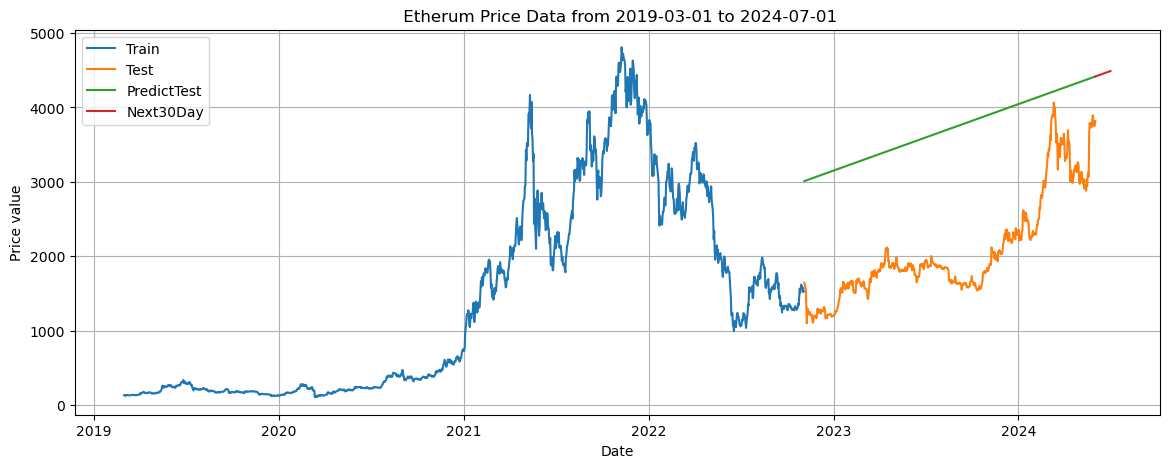

In [14]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f" Etherum Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()
     

<h2> Predict for 60 days </h2>

In [15]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

In [16]:
# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Ethereum prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted Ethereum prices for the next 60 days:
[4417.67784098 4420.1212781  4422.56471523 4425.00815236 4427.45158949
 4429.89502662 4432.33846375 4434.78190088 4437.22533801 4439.66877514
 4442.11221227 4444.5556494  4446.99908653 4449.44252366 4451.88596079
 4454.32939792 4456.77283505 4459.21627218 4461.65970931 4464.10314644
 4466.54658357 4468.99002069 4471.43345782 4473.87689495 4476.32033208
 4478.76376921 4481.20720634 4483.65064347 4486.0940806  4488.53751773
 4490.98095486 4493.42439199 4495.86782912 4498.31126625 4500.75470338
 4503.19814051 4505.64157764 4508.08501477 4510.5284519  4512.97188903
 4515.41532615 4517.85876328 4520.30220041 4522.74563754 4525.18907467
 4527.6325118  4530.07594893 4532.51938606 4534.96282319 4537.40626032
 4539.84969745 4542.29313458 4544.73657171 4547.18000884 4549.62344597
 4552.0668831  4554.51032023 4556.95375736 4559.39719449 4561.84063161]


In [17]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

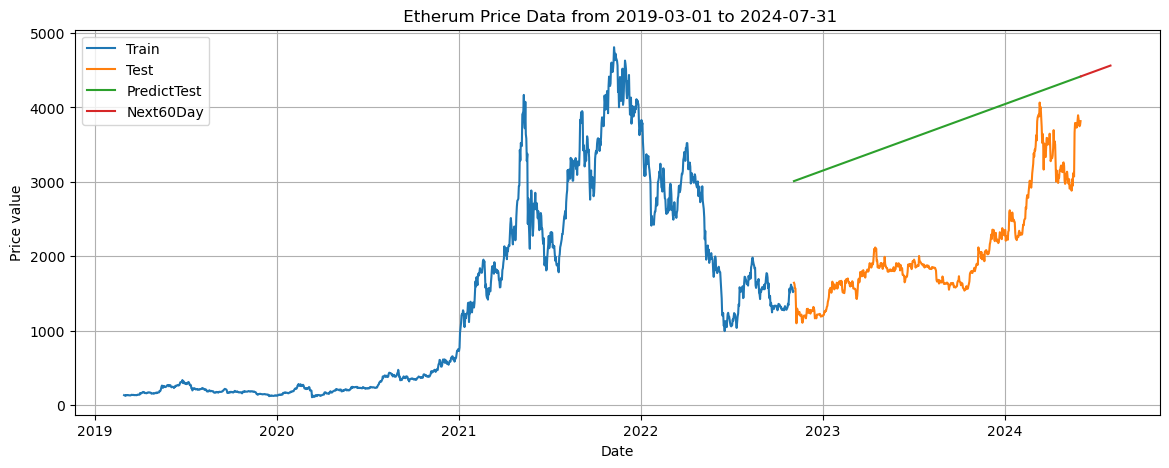

In [18]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f" Etherum Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()

<h2> Predict 90 days
    </h2>

In [19]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [20]:
# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Ethereum prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted Ethereum prices for the next 90 days:
[4417.67784098 4420.1212781  4422.56471523 4425.00815236 4427.45158949
 4429.89502662 4432.33846375 4434.78190088 4437.22533801 4439.66877514
 4442.11221227 4444.5556494  4446.99908653 4449.44252366 4451.88596079
 4454.32939792 4456.77283505 4459.21627218 4461.65970931 4464.10314644
 4466.54658357 4468.99002069 4471.43345782 4473.87689495 4476.32033208
 4478.76376921 4481.20720634 4483.65064347 4486.0940806  4488.53751773
 4490.98095486 4493.42439199 4495.86782912 4498.31126625 4500.75470338
 4503.19814051 4505.64157764 4508.08501477 4510.5284519  4512.97188903
 4515.41532615 4517.85876328 4520.30220041 4522.74563754 4525.18907467
 4527.6325118  4530.07594893 4532.51938606 4534.96282319 4537.40626032
 4539.84969745 4542.29313458 4544.73657171 4547.18000884 4549.62344597
 4552.0668831  4554.51032023 4556.95375736 4559.39719449 4561.84063161
 4564.28406874 4566.72750587 4569.170943   4571.61438013 4574.05781726
 4576.50125439 4578.94469152 

In [21]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

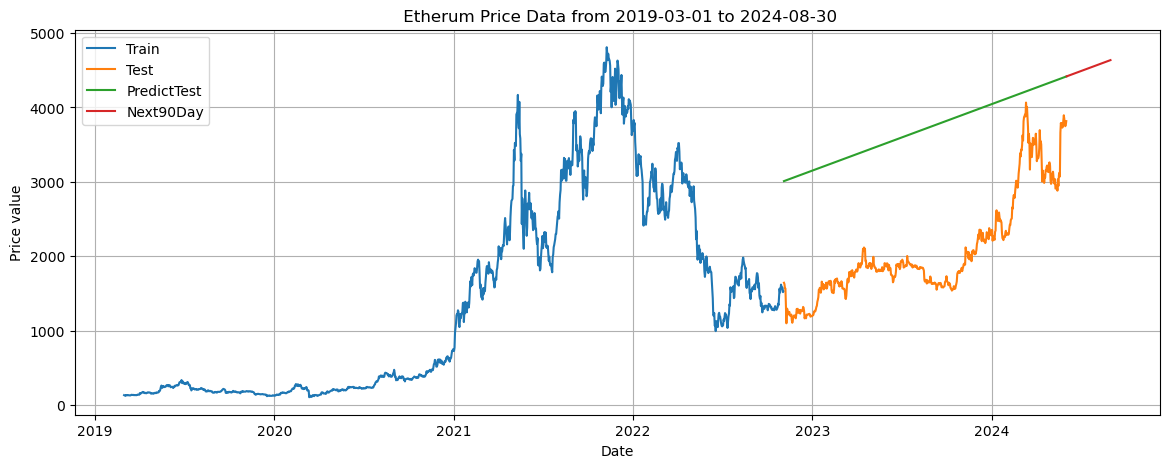

In [22]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f" Etherum Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()